The fashion giant Azra also has several physical retail stores where customers can try and buy apparel and fashion accessories. With increased internet penetration and higher adoption of e-commerce among customers, the footfall to the physical stores has been decreasing. To optimize operation costs, the company wishes to understand the factors that affect the revenue of a store. This will help them take better calls regarding setting up future stores and making decisions about the existing ones.

About the data:
 * revenue (the revenue of the storefront at each location)
 * location_age (the number of years since the store opened)
 * num_competitors (the number of competitors in a 20-mile radius)
 * median_income (the median income of the residents in the area)
 * num_loyalty_members (the members enrolled in the loyalty program in the area)
 * population_density (the population density of the area)

The goal of the project is to use the data to uncover some business insights that will help the company decide on store locations.

## Storefront location associations
Case questions: 
1.   Which variable has the strongest association with the revenue?
2.   Are all the associations intuitive and make business sense?



In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Marketing-Analytics/Data/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


Correlation

Correlation coefficients are a quantitative measure that describe the strength of association/relationship between two variables.

$cov(x, y) = \frac{1}{n-1} \Sigma (x_i-\overline{x})(y_i-\overline{y})$

$cor(x,y) = \frac{1}{n-1} \Sigma (\frac{x_i-\overline{x}}{s_x})(\frac{y_i-\overline{y})}{s_y})$

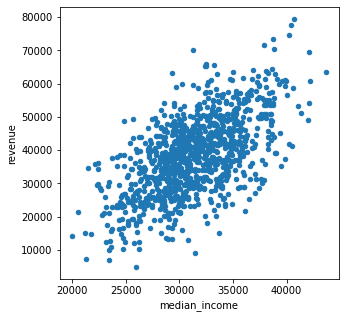

In [ ]:
# Scatter plot between median income and revenue

df.plot.scatter("median_income", 'revenue', figsize=[5,5])
plt.show()

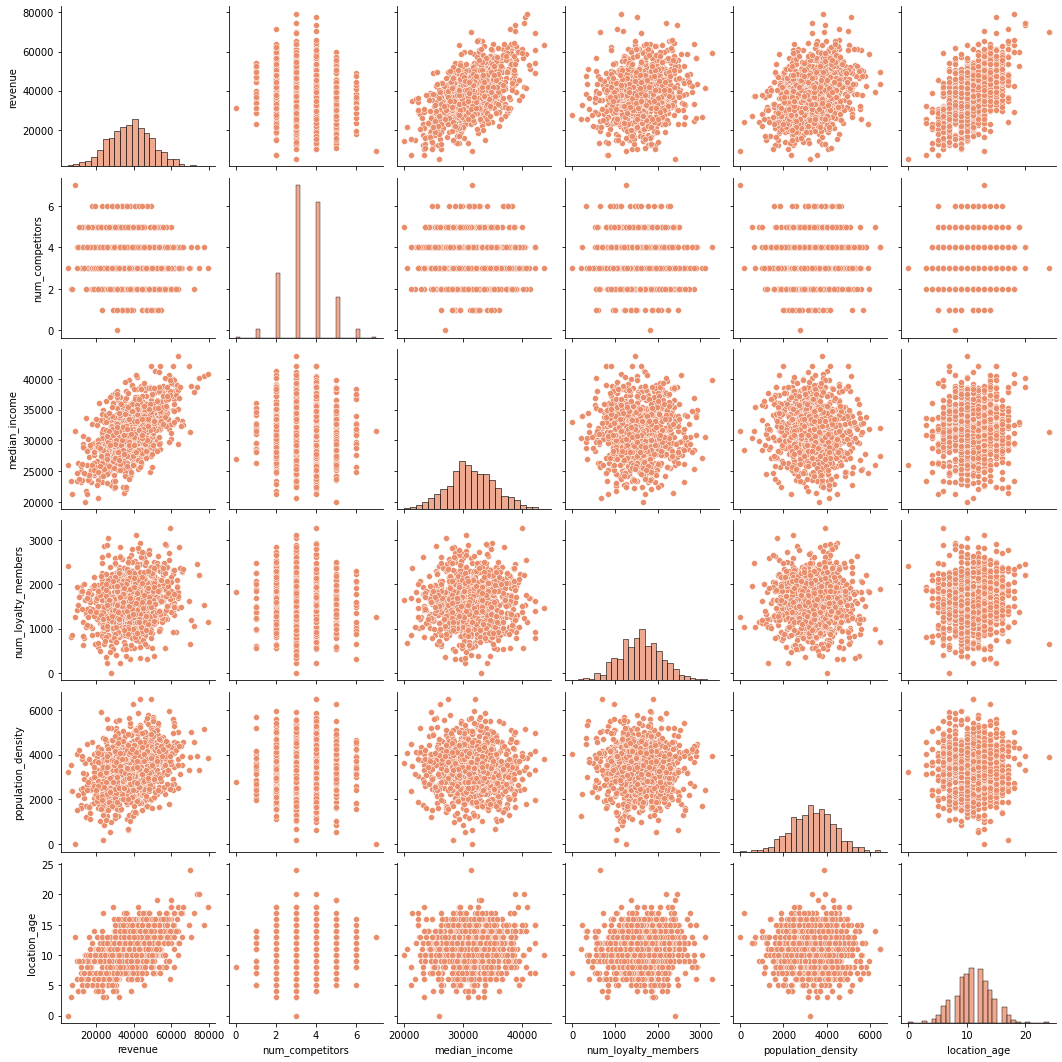

In [ ]:
# Pair plot

sns.set_palette('flare')
sns.pairplot(df)
plt.show()

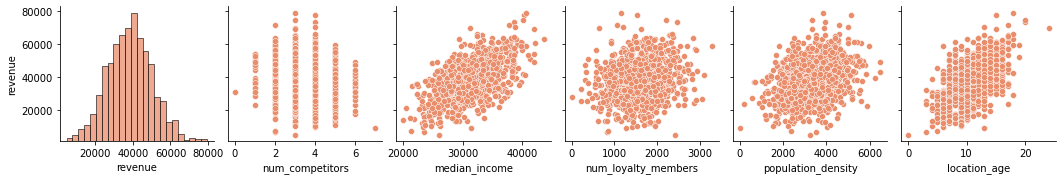

In [ ]:
sns.pairplot(df,x_vars=df.columns, y_vars="revenue")
plt.show()

In [ ]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


Revenue is most correlated with median income and location age (the number of years since the store opened). All associations of this dataset make business sense - revenue has a small negative correlation with number of local competitors. Revenue also has a small positive correlation with number of loyalty members and even more correlation with population density.  

## Predicting Store Revenue Using Linear Regression

This section of the projcet builds a predictive model using linear regression to predict the revenue of a store using information about its location.

Linear Regression

* simple linear regression model: $y_i = B_0 + B_ix_i + ϵ_i$
* $y_i$ - response variable
* $x_i$ - predictor variable or regressor
* $B_0$ - intercept
* $B_i$ - slope of $x_i$
* $ϵ_i$ - residual ($y_i - \hat y$)

Least-squares estimators
 * $\hat B_1 = \frac{\Sigma(x_i - \overline x)(y_i - \overline y)}{\Sigma(x_i - \overline x)^2}$
 * $\hat B_0 = \overline y - \hat B_1 \overline x$
 * $\sigma^2 = \frac{1}{n-2} \Sigma[y_i - (\hat B_0 + \hat B_1 x_i)]^2$

Prediction line: $\hat y = \hat B_0 + \hat B_1$

Coefficient of determination: $R^2 = \frac{\Sigma(\hat y - \overline y)^2}{(y_i - \overline y)^2}$
* $R^2$ ranges from 0 to 1 and is good (stronger) when closer to 1. This metric measures the percentage of variation explained by the regression line. 

In [45]:
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as tools
import statsmodels
from statsmodels.api import add_constant, OLS
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Marketing-Analytics/Data/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [46]:
X = df[['num_competitors', 'median_income', 'num_loyalty_members', 'population_density', 'location_age']]
y = df['revenue']
X = add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
model = OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     866.3
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        05:34:31   Log-Likelihood:                -9943.6
No. Observations:                1000   AIC:                         1.990e+04
Df Residuals:                     994   BIC:                         1.993e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.138e+04   1675.078    -30.673      0.000   -5.47e+04   -4.81e+04
num_competitors     -2101.6487    157.751    -13.323      0.000   -2411.211   -1792.086
median_income           1.7367      0.041     42.750      0.000       1.657       1.816
num_loyalty_members     3.5760      0.322     11.099      0.000       2.944       4.208
population_density      4.2131      0.164     25.666      0.000       3.891       4.535
location_age         2052.1441     52.845     38.833      0.000    1948.443    2155.845
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.382
Skew:                           0.038   Prob(JB):                        0.826
Kurtosis:                       2.942   Cond. No.                     3.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


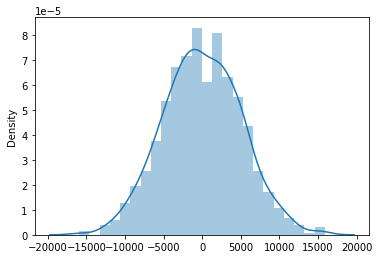

In [48]:
# histogram of residuals

sns.distplot(results.resid)

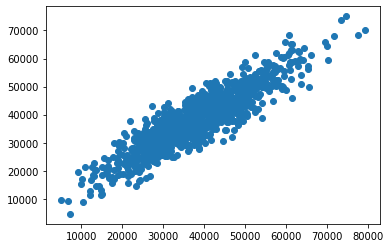

In [49]:
# scatter plot of actual revenue with predicted revenue

pred = results.predict(X)
plt.scatter(y, pred)

The marketing team has had the intuition that the number of competitors may not be a significant contributing factor to the revenue. Time to test a model without the number of competitors. 

In [50]:
# Drop num_competitors

X = df[['median_income', 'num_loyalty_members', 'population_density', 'location_age']]
y = df['revenue']
X = add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
model2 = OLS(y,X)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     882.1
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        05:35:25   Log-Likelihood:                -10026.
No. Observations:                1000   AIC:                         2.006e+04
Df Residuals:                     995   BIC:                         2.009e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.835e+04   1726.716    -33.791      0.000   -6.17e+04    -5.5e+04
median_income           1.7471      0.044     39.641      0.000       1.661       1.834
num_loyalty_members     3.6967      0.349     10.578      0.000       3.011       4.382
population_density      4.1371      0.178     23.241      0.000       3.788       4.486
location_age         2012.7209     57.251     35.156      0.000    1900.374    2125.067
==============================================================================
Omnibus:                        0.020   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.062
Skew:                           0.001   Prob(JB):                        0.970
Kurtosis:                       2.962   Cond. No.                     3.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
print('RMSE model: ', results.mse_resid**0.5)
print('RMSE model2: ', results2.mse_resid**0.5)

RMSE model:  5052.573013547702
RMSE model2:  5482.399095556265


The original model with the competitor variables is the best model. AIC and BIC are slightly lower and the adjusted R-squared is higher. The original model also has a lower RMSE.  